```
# This is formatted as code
```

# Exercise "0" - Introduction to Colab and some useful python skills

The excercises in this seminar are designed to work well in the Google Colab environments. You are free to run them on your local computer or another platform of your choice of course. 

As first step in *every* exercise, create a copy of every notebook for yourself with "File -> Save a copy in Drive".

When you execute the first code cell in the notebooks of the exercises, Colab will ask you, whether this is safe. You can happily click "Run anyway" because you trust your lecturers of course ;)

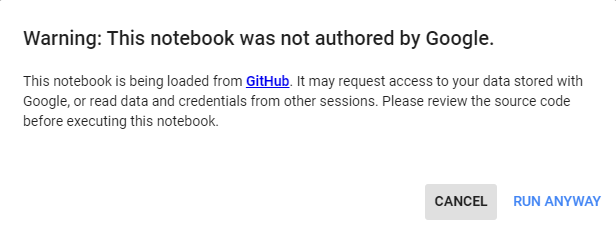

Google Colab essentiall works exactly like a Jupyter Notebook, which probably some of you are already familiar with. You can write and execute Python code interactively in every cell. The results are kept in memory until you restart the environment. Many Python packages like `numpy` or `scipy` are already preinstalled:

In [ ]:
import numpy as np

x = np.linspace(0, 2*np.pi, 100) # create 100 linearly spaced numbers from 0 to 2*pi
y = np.sin(x) # compute the sine of those values

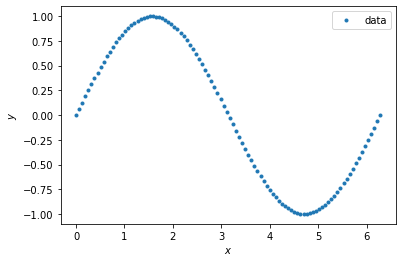

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x, y, '.', label='data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best'); # remove the `;` to see what changes
# you do not need to execute plt.show() in notebooks, the plot should appear anyway.

### Excersice 0: Hints
If you put the cursor inside of the brackets of a function, what happens if you hit `Shift+Tab` and then type anything (like a space or comma)? What about `Ctrl + Space`?

# Python packages used throughout the seminar

The most important Python packages, besides the machine learning libraries we will use ([`scikit-learn`](https://scikit-learn.org/stable/) and [`tensorflow`/`keras`](https://www.tensorflow.org/api_docs)), are certainly [`numpy`](https://numpy.org/doc/stable/contents.html), [`matplotlib`](https://matplotlib.org/stable/index.html) and [`pandas`](https://pandas.pydata.org/docs/index.html). Additionally, [`seaborn`](https://seaborn.pydata.org/) is a very use- and powerful visualization library.

# <a href=https://numpy.org><img src="https://numpy.org/images/logos/numpy.svg" width=50 align=center> numpy </a>refresher 
If you do not already know, you will learn that the world of machine learning is full of vectors and matrices. In Python, `numpy` is the tool of choice to handle those.


In [ ]:
vec = np.array([1,2,3,4,5,6])
print(vec)

[1 2 3 4 5 6]


In [ ]:
print('Shape of vec:', vec.shape)
print('Size of vec:', vec.size)
print('Dimension of vec:', vec.ndim)

Shape of vec: (6,)
Size of vec: 6
Dimension of vec: 1


In machine learning frameworks it is common, that both the design matrix `X` (the data we want to use for training) and the target vector `y` (the labels or whatever we want to predict as goal of the training) are expected in the form `SxF` (S,F) where `S` are the samples and `F` are the features.

In many cases, especially the target `y` has the shape like the vector we just created `(S,)`, in our case `(5,)`. This means, as you can see from the output of `vec.ndim`, that the vector is one-dimensional. There are two commonly used ways to change this to match the expected form for machine learning libraries:

In [ ]:
# reshape the existing vector into a SxF matrix
y = vec.reshape(6, 1)
print('y:', y)
print('Shape of y:', y.shape)
print('Size of y:', y.size)
print('Dimension of y:', y.ndim)

y: [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
Shape of y: (6, 1)
Size of y: 6
Dimension of y: 2


In [ ]:
# create a new dimension to transform the vector into a matrix
y = vec[:, np.newaxis]
print('y:', y)
print('Shape of y:', y.shape)
print('Size of y:', y.size)
print('Dimension of y:', y.ndim)

y: [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
Shape of y: (6, 1)
Size of y: 6
Dimension of y: 2


### Exercise 1: Row or column vector?

A common task in the background for machine learning are vector and matrix multiplications. Inspect the following commands. Which ones work, which ones give errors? If there is an error, why does it occur? If it works, what do they compute? What is a row vector, what a column vector in numpy? And what is the difference between those two anyway?

- a = vec.reshape(-1, 1)
- b = vec.reshape(1, -1)
- c = vec.reshape(2, 3)
- d = vec.reshape(-1, 3)
- d = vec.reshape(-1, -1)
- e = vec[..., np.newaxis]
- f = c[:, np.newaxis]
- g = c[np.newaxis, :, :]
- h = c[np.newaxis, ...]
- i = np.dot(vec, vec)
- j = vec @ vec
- k = vec.T
- l = a.T
- m = np.dot(a, vec)
- n = c @ d
- o = c.T @ d
- p = c @ d.T
- q = c @ d.T @ c
- r = np.dot(c, d.T)
- s = np.matmul(c, d.T)
- t = np.dot(c, 4)
- u = np.dot(4, c)
- v = 4*c


In [ ]:
# -1 specifies unknown dimension -> the other param. sets both dimensions 
# NxM-Matrix: N=columns, M=rows, vec.reshape(M,N)

a = vec.reshape(-1,1) # works 
b = vec.reshape(1,-1) # works
c = vec.reshape(2,3) # works 
d = vec.reshape(-1,3) # works
#d_1 = vec.reshape(-1,-1) # doesn't work because you have to specify at least one dimension
e = vec[4:6, np.newaxis] # np.newaxis creates a new dimension
f = c[:, np.newaxis] # works, c.shape=(2,3), f.shape=(2,1,3)
g = c[np.newaxis, :, :] #works, g.shape=(1,2,3)
h = c[np.newaxis, 0:, 1] #works
i = np.dot(vec,vec) # works
j = vec@vec # same as i
k = vec.T #works but can't transpose one dimension
l = a.T #transposition worked
# m = np.dot(a, vec) # doesn't work because of dimensions, a.ndim ungleich vec.ndim
# n = c@d # doesn't work because of reasons
o = c.T@d
p = c @ d.T
q = p @ c
r = np.dot(c, d.T) # 2d: preferred ist matmul or ätt
s = np.matmul(c, d.T)
t = np.dot(c, 4)
u = np.dot(4, c)
v = 4*c
v

array([[ 4,  8, 12],
       [16, 20, 24]])

## Excercise 2: Creating arrays

There are many ways to create arrays in numpy. Find out what the following do, what arguments they take and create some arrays with them:
- np.zeros( ... )
- np.zeros_like( ... )
- np.ones( ... )
- np.ones_like( ... )
- np.eye( ... )
- np.linspace( ... ) 
- np.logspace( ... )
- np.arange( ... )

In [ ]:
w = np.zeros_like(c) # zero matrix in same shape of given matrix
x = np.eye(3) # eyenheitsmatrix
y = np.logspace(3,5,10) # 10**3 bis 10**5, 10 Werte KRAMK

mat=np.arange(105).reshape(3,5,7)
mat

array([[[  0,   1,   2,   3,   4,   5,   6],
        [  7,   8,   9,  10,  11,  12,  13],
        [ 14,  15,  16,  17,  18,  19,  20],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 28,  29,  30,  31,  32,  33,  34]],

       [[ 35,  36,  37,  38,  39,  40,  41],
        [ 42,  43,  44,  45,  46,  47,  48],
        [ 49,  50,  51,  52,  53,  54,  55],
        [ 56,  57,  58,  59,  60,  61,  62],
        [ 63,  64,  65,  66,  67,  68,  69]],

       [[ 70,  71,  72,  73,  74,  75,  76],
        [ 77,  78,  79,  80,  81,  82,  83],
        [ 84,  85,  86,  87,  88,  89,  90],
        [ 91,  92,  93,  94,  95,  96,  97],
        [ 98,  99, 100, 101, 102, 103, 104]]])

## Exercise 3: Indexing and masking

You will in many cases not want to use all values from an array/vector/matrix. To select only some of them, you need to find a way to adress only those values. 
1. Create a matrix using the command `mat = np.arange(105).reshape(3, 5, 7)`. Describe the result. How many dimensions does it have, what is its shape, what is its minimum and maximum value.
2. Run the following commands and inspect the results. What do the commands do, how do they work? If there are errors, why do they occur? It can be helpful to display the matrix `mat` as well to see what's going on:
  - mat[2, 1, 6]
  - mat[:, 0, 0]
  - mat[:, 2, 4]
  - mat[:, 4, :]
  - mat[:, :, 7]
  - mat[..., 5]
  - mat[ mat > 25 ]
  - mat[ mat > 25 ].shape
  - mat[ (mat > 25) & (mat < 50) ]
  - mat[ (mat > 25) and (mat < 50) ]
  - mat[ (mat < 10) | (mat > 90) ]
  - np.where( mat > 100 ) 
  - np.where( mat < 50, 0, mat)
  - np.where( mat < 50, 0, 1)
  - mat [ mat < 50 ] = -1
  - mat [ np.where(mat < 50) ] = -1



In [ ]:
mat

array([[[  0,   1,   2,   3,   4,   5,   6],
        [  7,   8,   9,  10,  11,  12,  13],
        [ 14,  15,  16,  17,  18,  19,  20],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 28,  29,  30,  31,  32,  33,  34]],

       [[ 35,  36,  37,  38,  39,  40,  41],
        [ 42,  43,  44,  45,  46,  47,  48],
        [ 49,  50,  51,  52,  53,  54,  55],
        [ 56,  57,  58,  59,  60,  61,  62],
        [ 63,  64,  65,  66,  67,  68,  69]],

       [[ 70,  71,  72,  73,  74,  75,  76],
        [ 77,  78,  79,  80,  81,  82,  83],
        [ 84,  85,  86,  87,  88,  89,  90],
        [ 91,  92,  93,  94,  95,  96,  97],
        [ 98,  99, 100, 101, 102, 103, 104]]])

In [ ]:
mat [ np.where(mat < 50) ] = -1

mat.shape

(3, 5, 7)

## Exercise 4: Random numbers and statistics

Numpy also has many functions for random number generation and statistics. 
1. Look up the following functions and experiment with them to see how they work:
  - np.random.uniform( ... )
  - np.random.normal( ... )
  - np.random.poisson( ... )
  - np.random.choice( ... )
  - np.random.shuffle( ... )

2. More tasks with random numbers:
  - what is wrong with this: `a = np.shuffle(b)`
  - look up the function `plt.hist( ... )` and show histograms of a Gaussian and a normal distribution. What can you do with the parameters `range`, `bins`, `alpha`, `density`, `histtype`, `stacked`?
  - create a matrix `A` of shape (5, 4, 3, 2, 1) of Gaussian distributed values
  - what does `A.mean()` do? What does `A.mean(axis=(1, 3, 5))` do?
  - Does `A.std()` compute a sample or population standard deviation? What is the difference between them?
  - create another matrix `B = np.ones(shape=(6, 8, 10))`. Execute the following: `B_rebin = B.reshape(3, 2, 4, 2, 5, 2).mean(axis=(1, 3, 5))`. What is the result? What happend here? In what real situations would you use `mean` here, when `sum`?


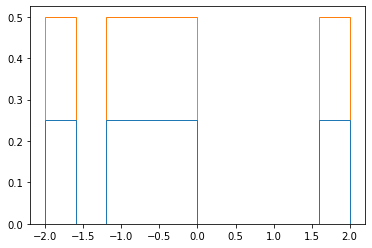

In [ ]:
np.random.seed(2)
x = np.random.normal(0,1,6)
plt.hist((x,x) , 10, (-2,2), density=True, histtype='step', stacked=True);
A = x.reshape(1,2,3)

In [ ]:
A.mean(axis=(0,1,2))

-0.6006888187910554

## <a href=https://pandas.pydata.org/><img src=https://pandas.pydata.org/docs/_static/pandas.svg align=center width=150></a> refresher

From the [pandas documentation](https://pandas.pydata.org/docs/getting_started/index.html): 

### What kind of data does pandas handle?
When working with tabular data, such as data stored in spreadsheets or databases, pandas is the right tool for you. pandas will help you to explore, clean and process your data. In pandas, a data table is called a DataFrame.

<img src=https://pandas.pydata.org/docs/_images/01_table_dataframe.svg align=center width=300>

The pandas documentation is *that* good, that rewriting it would be pointless. 

### Exercise 5: 10 minutes to pandas

To get warm with pandas, you should work your way through [this excellent quick start](https://pandas.pydata.org/docs/user_guide/10min.html#min) before you answer the following questions:
- what is a DataFrame?
- what is a Series?
- How is a Series/ DataFrame different from numpy arrays?
- How do you get numpy arrays from DataFrames?
- What do you need `.loc( ... )` for?
- What does `groupby` do? Find a real-world scenario where this might be very useful. Can you think of a potential application in machine learning?
- There are preinstalled data samples on the virtual machines running this Colab notebook. Use pandas `read_csv` to load the file `"sample_data/california_housing_train.csv"`. What do you think does this dataset describe? Look it up on the internet. 
  - How many entries does the table have? How many columns? Are there missing values?
  - what are the min, max, mean and std dev of each column?
  - Create a scatterplot of `median_house_value` against `median_income`
  - Create a new column containing `total_rooms/population`.


In [ ]:
!ls sample_data

In [ ]:
import pandas as pd

pd = pd.read_csv('sample_data/california_housing_train.csv')
pd.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
pd['ratio_rooms_per_pop'] = pd['total_rooms']/pd['population']
pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ratio_rooms_per_pop
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,5.529064
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,6.775908
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,2.162162
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,2.914563
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,2.330128
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,2.444322
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,1.967337
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,2.151929
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,2.058552


# <a href=https://seaborn.pydata.org/><img src=https://seaborn.pydata.org/_static/logo-wide-lightbg.svg width=200 align=center></a> - just a word on it

Seaborn simply makes quite nice plots. You should check out [their documentation](https://seaborn.pydata.org/). This is one example plot:

In [ ]:
import seaborn as sns
# read the csv we used before
data = pd.read_csv("sample_data/california_housing_train.csv")
# we create a new category feature dividing the house value in 4 ranges 
data["price_category"] = pd.cut(data["median_house_value"], 4)
# the actual plot
sns.pairplot(data, vars=["total_rooms", "households", "median_income"], hue="price_category")

## K-Nearest Neighbors

### Excercise 6: Perform a classification using K-nearest neighbors classifier discussed in the lecture.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# we load the training data from the local virtual machine as well and get a numpy array from it
mnist_train = pd.read_csv("sample_data/mnist_train_small.csv", header=None ).to_numpy()
# the first entry is the digit, the rest of the array contains the pixel values
digits_train = mnist_train[:,0]
images_train = mnist_train[:,1:]
print(digits_train.shape)
print(images_train.shape)

In [ ]:
# the images are 28x28 but we will use the flattened array for training because KNN can only handle tabular data
plt.imshow(images_train[0].reshape(28,28));
print(f"This is a {digits_train[0]}")

In [ ]:
# we train on some data and then we test on some other data, where would be the joke otherwise?
mnist_test = pd.read_csv("sample_data/mnist_test.csv", header=None ).to_numpy()
digits_test = mnist_test[:,0]
images_test = mnist_test[:,1:]

In [ ]:
# import the classifier
from sklearn.neighbors import KNeighborsClassifier

# we use 7 next neighbors (this is rather much)
kn = KNeighborsClassifier(n_neighbors=7)

# for now, we will only use 100 training samples to keep the runtime low
N_samples = 100
X_train = images_train[:N_samples]
y_train = digits_train[:N_samples]
# this trains the KNN classifier. We pass the images and the digits as design matrix and target vector
kn.fit(X_train, y_train)

In [ ]:
rows    = 3
columns = 4
f, axes = plt.subplots(rows, columns, figsize=(10,8))

idx = 0
for r in range(rows):
  for c in range(columns):
      img        = images_test[idx].reshape(1, -1) # the shape needs to be (1, features)
      digit_true = digits_test[idx]
      digit_pred = kn.predict(img)
      axes[r, c].imshow(img.reshape(28,28))
      axes[r, c].set_title(f"true: {digit_true}, pred: {digit_pred}")
      idx += 1

# The actual tasks:
- Predict the digits for the whole training and test data set
- Compute the accuracy for both training and test predictions. How much difference is there?
- Plot some examples of misclassified digits.
- How does the performance of the algorithm change with the number of nearest neighbours?

In [ ]:
# space for solutions